In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Albostan\.gemini\antigravity\playground\sparse-sagan\data\aircraft_engine_data_raw.csv')
(df.head())

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset_id,set_type
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001,train
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,FD001,train
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,FD001,train
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,FD001,train
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,FD001,train


In [3]:
duplicates_count = df.duplicated().sum()
duplicates_count

np.int64(0)

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Albostan\.gemini\antigravity\playground\sparse-sagan\data\aircraft_engine_data_raw.csv')

train = df[df["set_type"] == "train"].copy()

max_cycle = (
    train.groupby(["dataset_id", "unit_number"])["time_in_cycles"]
    .max()
    .rename("max_cycle")
)

train = train.merge(max_cycle, on=["dataset_id", "unit_number"], how="left")
train["RUL"] = train["max_cycle"] - train["time_in_cycles"]

bins = [-1, 15, 30, 60, np.inf]
labels = [3, 2, 1, 0]
train["maintenance_class"] = pd.cut(train["RUL"], bins=bins, labels=labels).astype(int)

print(train[["dataset_id","unit_number","time_in_cycles","max_cycle","RUL","maintenance_class"]].head(10))
print(train["maintenance_class"].value_counts().sort_index())
print(train["maintenance_class"].value_counts(normalize=True).sort_index())


  dataset_id  unit_number  time_in_cycles  max_cycle  RUL  maintenance_class
0      FD001            1               1        192  191                  0
1      FD001            1               2        192  190                  0
2      FD001            1               3        192  189                  0
3      FD001            1               4        192  188                  0
4      FD001            1               5        192  187                  0
5      FD001            1               6        192  186                  0
6      FD001            1               7        192  185                  0
7      FD001            1               8        192  184                  0
8      FD001            1               9        192  183                  0
9      FD001            1              10        192  182                  0
maintenance_class
0    117110
1     21270
2     10635
3     11344
Name: count, dtype: int64
maintenance_class
0    0.730299
1    0.132640
2    0.066320
3

In [5]:
from sklearn.model_selection import train_test_split

engines = (
    train[["dataset_id", "unit_number"]]
    .drop_duplicates()
)

train_engines, val_engines = train_test_split(
    engines,
    test_size=0.2,
    random_state=42
)

train_df = train.merge(
    train_engines,
    on=["dataset_id", "unit_number"],
    how="inner"
)

val_df = train.merge(
    val_engines,
    on=["dataset_id", "unit_number"],
    how="inner"
)

print("عدد المحركات:")
print("Train engines:", train_engines.shape[0])
print("Validation engines:", val_engines.shape[0])

print("\nعدد الصفوف:")
print("Train rows:", train_df.shape[0])
print("Validation rows:", val_df.shape[0])

intersection = pd.merge(
    train_engines,
    val_engines,
    on=["dataset_id", "unit_number"],
    how="inner"
)
print("\nمحركات مشتركة بين Train و Val:", intersection.shape[0])

عدد المحركات:
Train engines: 567
Validation engines: 142

عدد الصفوف:
Train rows: 129319
Validation rows: 31040

محركات مشتركة بين Train و Val: 0


In [6]:
drop_cols = [
    "maintenance_class",
    "RUL",
    "max_cycle",
    "set_type",
    "unit_number",
    "dataset_id",
    "time_in_cycles"
]

X_train = train_df.drop(columns=drop_cols)
y_train = train_df["maintenance_class"]

X_val = val_df.drop(columns=drop_cols)
y_val = val_df["maintenance_class"]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("\nأول 5 أعمدة Features:")
print(X_train.columns[:5])

X_train shape: (129319, 24)
y_train shape: (129319,)
X_val shape: (31040, 24)
y_val shape: (31040,)

أول 5 أعمدة Features:
Index(['op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_measurement_1',
       'sensor_measurement_2'],
      dtype='object')


In [7]:
unique_counts = X_train.nunique().sort_values()

print(unique_counts)

sensor_measurement_19        2
op_setting_3                 2
sensor_measurement_16        2
sensor_measurement_1         6
sensor_measurement_5         6
sensor_measurement_18        6
sensor_measurement_10       21
sensor_measurement_6        47
sensor_measurement_17       58
op_setting_2               111
sensor_measurement_13      552
op_setting_1               666
sensor_measurement_20      667
sensor_measurement_11      767
sensor_measurement_8      1140
sensor_measurement_2      1777
sensor_measurement_12     5871
sensor_measurement_7      6205
sensor_measurement_15    12839
sensor_measurement_3     15000
sensor_measurement_14    19314
sensor_measurement_4     19907
sensor_measurement_21    25680
sensor_measurement_9     32180
dtype: int64


In [8]:
std_values = X_train.std().sort_values()

print(std_values)


sensor_measurement_16      0.004998
sensor_measurement_10      0.142056
op_setting_2               0.367704
sensor_measurement_15      0.751495
sensor_measurement_11      3.427461
sensor_measurement_5       4.262310
sensor_measurement_19      4.663960
sensor_measurement_6       6.438907
sensor_measurement_21      7.011377
sensor_measurement_20     11.685619
op_setting_3              12.379455
op_setting_1              16.522625
sensor_measurement_1      30.405322
sensor_measurement_17     31.016981
sensor_measurement_2      42.455110
sensor_measurement_14     80.850061
sensor_measurement_13    111.350883
sensor_measurement_3     118.162739
sensor_measurement_4     136.264738
sensor_measurement_8     142.471620
sensor_measurement_18    142.558522
sensor_measurement_12    164.100170
sensor_measurement_7     174.035104
sensor_measurement_9     374.699054
dtype: float64


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22378
           1       0.58      0.46      0.51      4260
           2       0.57      0.47      0.52      2130
           3       0.81      0.86      0.83      2272

    accuracy                           0.85     31040
   macro avg       0.72      0.69      0.70     31040
weighted avg       0.84      0.85      0.84     31040

[[21541   805    24     8]
 [ 1816  1958   443    43]
 [   91   613  1011   415]
 [    1    24   288  1959]]


In [10]:
import numpy as np

sensor_cols = [c for c in X_train.columns if c.startswith("sensor_")]

def add_rolling_features(df, window=5):
    df = df.copy()
    df = df.sort_values(["dataset_id", "unit_number", "time_in_cycles"])
    
    for col in sensor_cols:
        df[f"{col}_roll_mean"] = (
            df.groupby(["dataset_id", "unit_number"])[col]
              .transform(lambda x: x.rolling(window, min_periods=1).mean())
        )
        
        df[f"{col}_roll_std"] = (
            df.groupby(["dataset_id", "unit_number"])[col]
              .transform(lambda x: x.rolling(window, min_periods=1).std())
        )
        
        df[f"{col}_delta"] = (
            df.groupby(["dataset_id", "unit_number"])[col]
              .diff()
        )
    
    df = df.fillna(0)
    return df


In [11]:
train_tmp = train_df[["dataset_id","unit_number","time_in_cycles"]].join(X_train)
val_tmp   = val_df[["dataset_id","unit_number","time_in_cycles"]].join(X_val)

X_train_fe = add_rolling_features(train_tmp)
X_val_fe   = add_rolling_features(val_tmp)

X_train_fe = X_train_fe.drop(columns=["dataset_id","unit_number","time_in_cycles"])
X_val_fe   = X_val_fe.drop(columns=["dataset_id","unit_number","time_in_cycles"])

print("X_train_fe shape:", X_train_fe.shape)
print("X_val_fe shape:", X_val_fe.shape)

X_train_fe shape: (129319, 87)
X_val_fe shape: (31040, 87)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_fe = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf_fe.fit(X_train_fe, y_train)
y_pred_fe = rf_fe.predict(X_val_fe)

print(classification_report(y_val, y_pred_fe))
print(confusion_matrix(y_val, y_pred_fe))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     22378
           1       0.59      0.43      0.49      4260
           2       0.59      0.45      0.51      2130
           3       0.81      0.88      0.84      2272

    accuracy                           0.85     31040
   macro avg       0.72      0.68      0.70     31040
weighted avg       0.84      0.85      0.84     31040

[[21710   642    17     9]
 [ 1980  1822   413    45]
 [  127   616   959   428]
 [    1    24   249  1998]]


In [13]:
import pandas as pd

importances = rf_fe.feature_importances_

fi_df = pd.DataFrame({
    "feature": X_train_fe.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

fi_df.head(15)


,feature,importance
13,sensor_measurement_11,0.072038
6,sensor_measurement_4,0.057262
15,sensor_measurement_13,0.055001
17,sensor_measurement_15,0.048458
16,sensor_measurement_14,0.035728
11,sensor_measurement_9,0.033026
14,sensor_measurement_12,0.029953
10,sensor_measurement_8,0.029789
9,sensor_measurement_7,0.027715
5,sensor_measurement_3,0.026790


In [14]:
from sklearn.metrics import confusion_matrix

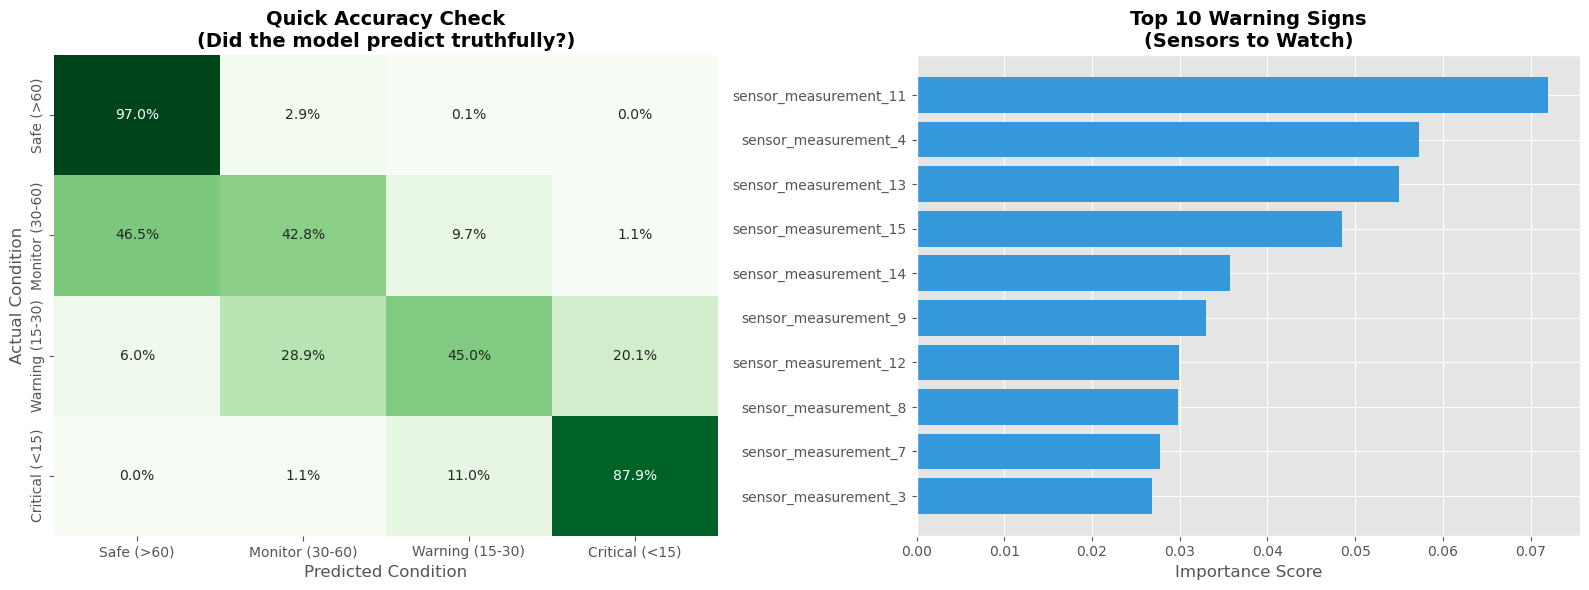

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix  

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
labels_map = ['Safe (>60)', 'Monitor (30-60)', 'Warning (15-30)', 'Critical (<15)']

cm = confusion_matrix(y_val, y_pred_fe)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_percent, annot=True, fmt='.1%', cmap='Greens', cbar=False,
            xticklabels=labels_map, yticklabels=labels_map)
plt.title('Quick Accuracy Check\n(Did the model predict truthfully?)', fontsize=14, fontweight='bold')
plt.ylabel('Actual Condition', fontsize=12)
plt.xlabel('Predicted Condition', fontsize=12)

plt.subplot(1, 2, 2)
top_features = fi_df['feature'].head(10)
top_scores = fi_df['importance'].head(10)

plt.barh(range(10), top_scores, align='center', color='#3498db')
plt.yticks(range(10), top_features)
plt.gca().invert_yaxis() 
plt.title('Top 10 Warning Signs\n(Sensors to Watch)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)

plt.tight_layout()
plt.show()